# Data List

Source: https://opendap.nccs.nasa.gov/dods/GEOS-5/fp/0.25_deg/assim

- [x] [inst3_2d_asm_Nx](#inst3_2d_asm_Nx)
- [x] [tavg1_2d_slv_Nx](#tavg1_2d_slv_Nx) 
- [x] [tavg1_2d_rad_Nx](#tavg1_2d_rad_Nx)
- [x] [tavg3_2d_aer_Nx](#tavg3_2d_aer_Nx)

# Download using pywapor

In [1]:
#environment: phd
import pywapor
import datetime

folder=r"E:\WaPORQA\GEOS5"
latlim=[-40, 40]
lonlim=[-30, 65]
timelim=[datetime.date(2018, 1, 1), datetime.date(2018,1,2)]
product_name="inst3_2d_asm_Nx"
req_vars=[                "t_air", "u2m", "v2m", "qv", 
                "wv", 
                "p_air", "p_air_0"
                ]
#pywapor.collect.product.GEOS5.download(folder, latlim, lonlim, timelim, product_name, req_vars = req_vars)

In [1]:
from datetime import datetime, timedelta
import os
import time

# Define the start and end dates
start_date = datetime(2018, 1, 1)
end_date = datetime(2023, 1, 1)

# Create an empty list to store the dates
date_list = []

# Calculate the dates in between
current_date = start_date
while current_date <= end_date:
    date_list.append(current_date)
    current_date += timedelta(days=1)
date_list

[datetime.datetime(2018, 1, 1, 0, 0),
 datetime.datetime(2018, 1, 2, 0, 0),
 datetime.datetime(2018, 1, 3, 0, 0),
 datetime.datetime(2018, 1, 4, 0, 0),
 datetime.datetime(2018, 1, 5, 0, 0),
 datetime.datetime(2018, 1, 6, 0, 0),
 datetime.datetime(2018, 1, 7, 0, 0),
 datetime.datetime(2018, 1, 8, 0, 0),
 datetime.datetime(2018, 1, 9, 0, 0),
 datetime.datetime(2018, 1, 10, 0, 0),
 datetime.datetime(2018, 1, 11, 0, 0),
 datetime.datetime(2018, 1, 12, 0, 0),
 datetime.datetime(2018, 1, 13, 0, 0),
 datetime.datetime(2018, 1, 14, 0, 0),
 datetime.datetime(2018, 1, 15, 0, 0),
 datetime.datetime(2018, 1, 16, 0, 0),
 datetime.datetime(2018, 1, 17, 0, 0),
 datetime.datetime(2018, 1, 18, 0, 0),
 datetime.datetime(2018, 1, 19, 0, 0),
 datetime.datetime(2018, 1, 20, 0, 0),
 datetime.datetime(2018, 1, 21, 0, 0),
 datetime.datetime(2018, 1, 22, 0, 0),
 datetime.datetime(2018, 1, 23, 0, 0),
 datetime.datetime(2018, 1, 24, 0, 0),
 datetime.datetime(2018, 1, 25, 0, 0),
 datetime.datetime(2018, 1, 26, 0,

In [2]:
for date in date_list:
    timelim=[date, date + timedelta(days=1)]
timelim

[datetime.datetime(2023, 1, 1, 0, 0), datetime.datetime(2023, 1, 2, 0, 0)]

In [3]:

## same script
import requests
import time

max_retries = 10  # Maximum number of retries
retry_delay = 180  # Time to wait before retrying (in seconds)
retry_count = 0

default_file_name=os.path.join(folder, f"{product_name}.nc")

for date in date_list:
    timelim=[date, date + timedelta(days=1)]
    new_file_name=os.path.join(folder, f"{product_name}{date.strftime('-%Y-%m-%d')}.nc")
    if not os.path.isfile(new_file_name):
        while retry_count < max_retries:
            try:
                pywapor.collect.product.GEOS5.download(folder, latlim, lonlim, timelim, 
                                               product_name, req_vars = req_vars,
                                              fn=new_file_name)   
                break
            except:                
                print(f"Retrying in {retry_delay} seconds...")
                retry_count += 1
                time.sleep(retry_delay)
            if retry_count == max_retries:
                print(f"Max retries reached. Failed to retrieve data from the server.")
            else:
                print("Data successfully retrieved.")
                retry_count = 0

            

Retrying in 180 seconds...
Data successfully retrieved.
Retrying in 180 seconds...
Data successfully retrieved.
Retrying in 180 seconds...
Data successfully retrieved.
Retrying in 180 seconds...
Data successfully retrieved.
Retrying in 180 seconds...
Data successfully retrieved.
Retrying in 180 seconds...
Data successfully retrieved.
Retrying in 180 seconds...
Data successfully retrieved.


**NOTES**

pywapor did some kind of resampling => change the datetime of datasets from 0 3 6 9 ... to 1:30 4:30 7:30 10:30

In [27]:
import glob
folder=r"E:\WaPORQA\GEOS5"
fhs=glob.glob(os.path.join(folder,'*.nc'))

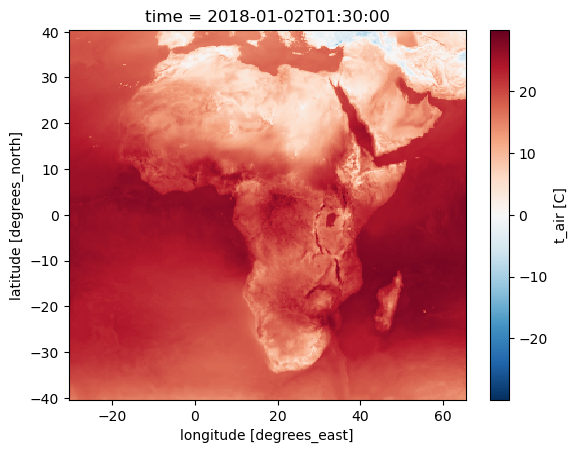

In [28]:
import xarray as xr
dts=xr.open_dataset(fhs[0])
dts.time
dts.t_air[8].plot()
data1=dts.t_air[8]

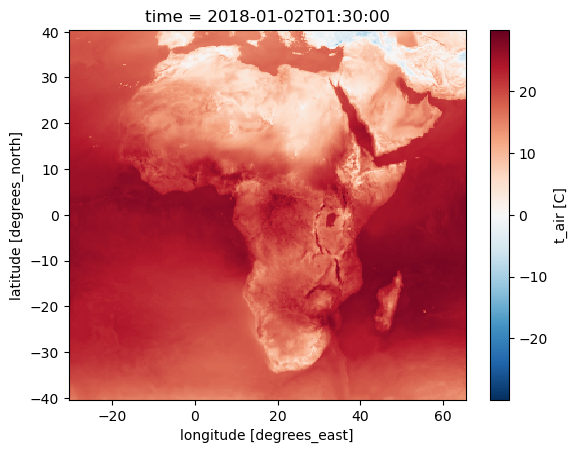

In [29]:
dts=xr.open_dataset(fhs[1])
dts.time
dts.t_air[0].plot()
data2=dts.t_air[0]

**Notes**: 2 dataarray with the same time shows same outputs

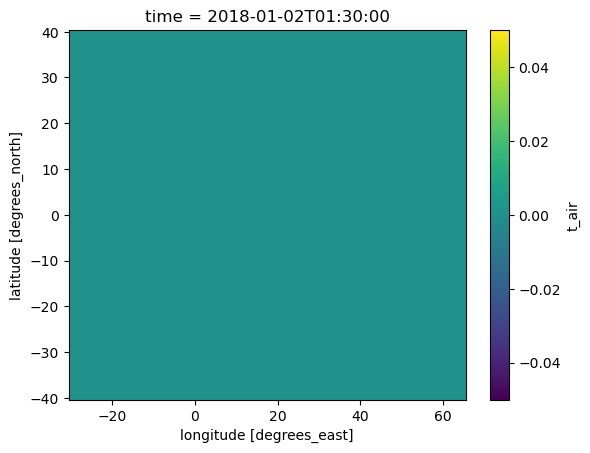

In [34]:
dts0=xr.open_dataset(fhs[0])
dts1=xr.open_dataset(fhs[1])
diff=dts0.t_air[-1]-dts1.t_air[0]
diff.plot()

In [12]:
diff.x

<xarray.DataArray 'x' (x: 307)>
array([-30.3125, -30.    , -29.6875, ...,  64.6875,  65.    ,  65.3125])
Coordinates:
  * x        (x) float64 -30.31 -30.0 -29.69 -29.38 ... 64.38 64.69 65.0 65.31
Attributes:
    grads_dim:      x
    grads_mapping:  linear
    grads_size:     1152
    units:          degrees_east
    long_name:      longitude
    minimum:        -180.0
    maximum:        179.6875
    resolution:     0.3125

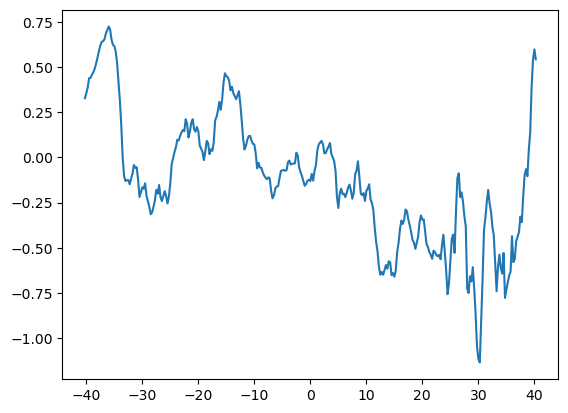

In [14]:
import matplotlib.pyplot as plt
lat=diff.mean(dim='x')
plt.plot(diff.y, lat)

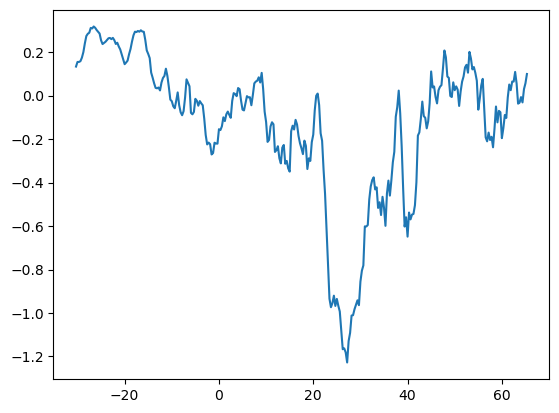

In [15]:
lat=diff.mean(dim='y')
plt.plot(diff.x, lat)

## Compare data download using pywapor with OPENDAP

In [17]:
remote_data = xr.open_dataset('https://opendap.nccs.nasa.gov/dods/GEOS-5/fp/0.25_deg/assim/inst3_2d_asm_Nx')


# Define the time period you want to slice
import numpy as np
start_time = np.datetime64('2018-01-01T00:00:00')
end_time = np.datetime64('2018-01-02T11:59:00')

# Define the spatial area you want to slice: WaPOR v3 L2 extent
min_lat = -40
max_lat = 40.0
min_lon = -30
max_lon = 65

# Slice the dataset based on time and spatial coordinates
sliced_ds = remote_data.sel(
    time=slice(start_time, end_time),
    lat=slice(min_lat, max_lat),
    lon=slice(min_lon, max_lon)
)
sliced_ds


<xarray.Dataset>
Dimensions:     (time: 12, lat: 321, lon: 305)
Coordinates:
  * time        (time) datetime64[ns] 2018-01-01 ... 2018-01-02T09:00:00
  * lat         (lat) float64 -40.0 -39.75 -39.5 -39.25 ... 39.5 39.75 40.0
  * lon         (lon) float64 -30.0 -29.69 -29.38 -29.06 ... 64.38 64.69 65.0
Data variables: (12/29)
    ts          (time, lat, lon) float32 ...
    qv10m       (time, lat, lon) float32 ...
    t2mmax      (time, lat, lon) float32 ...
    t10m        (time, lat, lon) float32 ...
    tprecmax    (time, lat, lon) float32 ...
    to3         (time, lat, lon) float32 ...
    ...          ...
    qv2m        (time, lat, lon) float32 ...
    tox         (time, lat, lon) float32 ...
    troppt      (time, lat, lon) float32 ...
    v50m        (time, lat, lon) float32 ...
    tropt       (time, lat, lon) float32 ...
    tqv         (time, lat, lon) float32 ...
Attributes:
    title:                GEOS5 FP 2d assimilated state
    Conventions:          COARDS\nGrADS
    dataType:             Grid
    history:              Fri Nov 10 12:25:59 UTC 2023 : imported by GrADS Da...
    extra_das_attribute:  This is an example of metadata added using a supple...

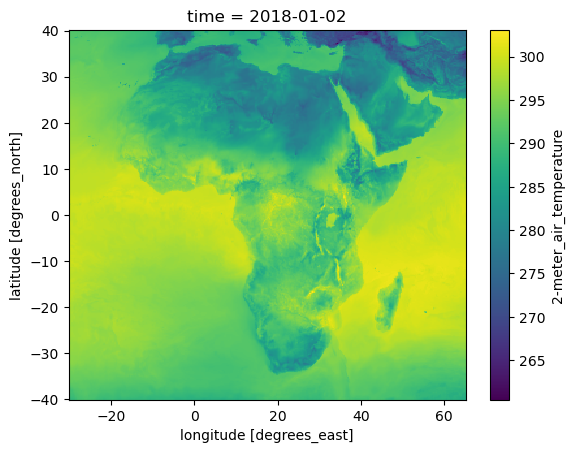

In [18]:
sliced_ds.t2m[8].plot()


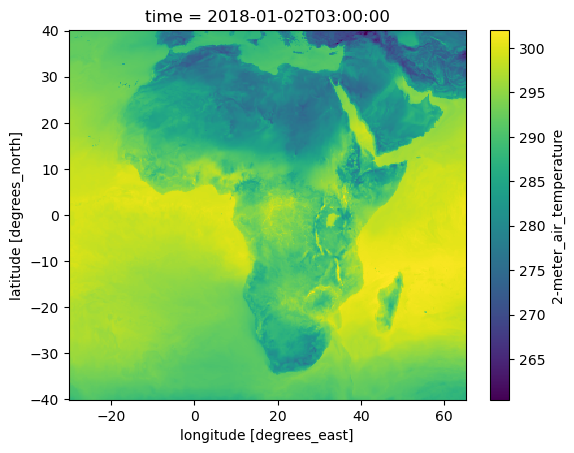

In [20]:
sliced_ds.t2m[9].plot()

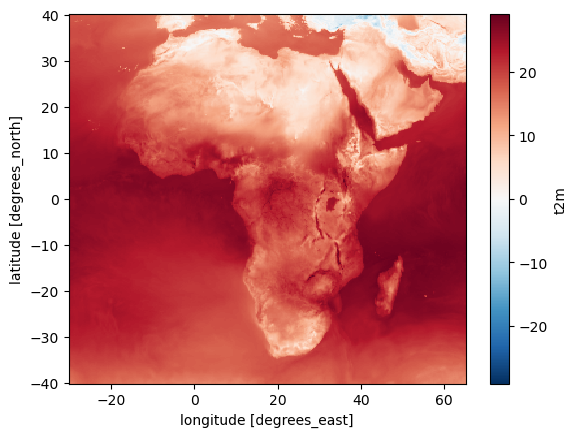

In [21]:
interpolated=(sliced_ds.t2m[8]+sliced_ds.t2m[9])/2- 273.15
interpolated.plot()

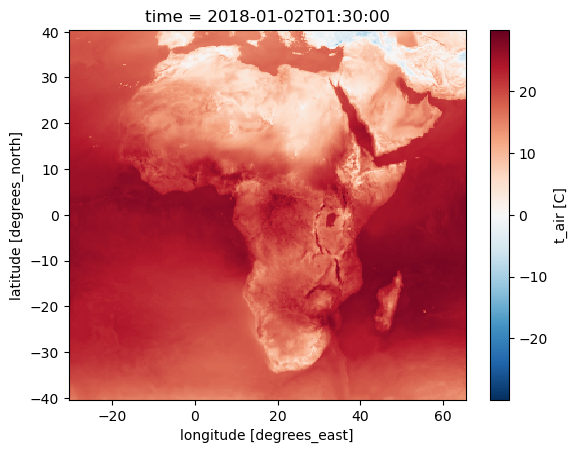

In [32]:
data2.plot()

# inst3_2d_asm_Nx

u10m, tqv, tqi, troppv, tql, hournorain, taitime, tropt, qv2m,
v50m, tox, t2m, t2mmax, t10m, t2mmin, slp, v10m, to3, tropq,
u2m, tprecmax, v2m, ps, disph, ts, u50m, qv10m, troppt, troppb

**Bulk-Download using OpenDAP**

In [1]:
import xarray as xr
import time
import numpy as np
import pandas as pd
import os

remote_data = xr.open_dataset('https://opendap.nccs.nasa.gov/dods/GEOS-5/fp/0.25_deg/assim/inst3_2d_asm_Nx')

remote_data

C:\Users\ntr002\Miniconda3\envs\phd\lib\site-packages\xarray\coding\times.py:153: SerializationWarning: Ambiguous reference date string: 1-1-1 00:00:0.0. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0001-1-1 00:00:0.0). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  warnings.warn(warning_msg, SerializationWarning)


<xarray.Dataset>
Dimensions:     (time: 17474, lat: 721, lon: 1152)
Coordinates:
  * time        (time) datetime64[ns] 2017-12-01 ... 2023-11-24T03:00:00
  * lat         (lat) float64 -90.0 -89.75 -89.5 -89.25 ... 89.5 89.75 90.0
  * lon         (lon) float64 -180.0 -179.7 -179.4 -179.1 ... 179.1 179.4 179.7
Data variables: (12/29)
    u2m         (time, lat, lon) float32 ...
    to3         (time, lat, lon) float32 ...
    qv2m        (time, lat, lon) float32 ...
    ps          (time, lat, lon) float32 ...
    t10m        (time, lat, lon) float32 ...
    troppt      (time, lat, lon) float32 ...
    ...          ...
    v10m        (time, lat, lon) float32 ...
    tql         (time, lat, lon) float32 ...
    qv10m       (time, lat, lon) float32 ...
    disph       (time, lat, lon) float32 ...
    t2mmin      (time, lat, lon) float32 ...
    tqi         (time, lat, lon) float32 ...
Attributes:
    title:                GEOS5 FP 2d assimilated state
    Conventions:          COARDS\nGrADS
    dataType:             Grid
    history:              Fri Nov 24 13:22:23 UTC 2023 : imported by GrADS Da...
    extra_das_attribute:  This is an example of metadata added using a supple...

In [ ]:
start_date = '2018-07-07'
end_date = '2023-01-01'
min_lat = -40
max_lat = 40.0
min_lon = -30
max_lon = 65
folder=r'E:/WaPORQA/GEOS5'

####
date_range = pd.date_range(start=start_date, end=end_date)
for i in range(len(date_range)-1):    
    start_time = np.datetime64(date_range[i])
    end_time = np.datetime64(date_range[i+1])-1
    sliced_ds = remote_data.sel(
    time=slice(start_time, end_time),
    lat=slice(min_lat, max_lat),
    lon=slice(min_lon, max_lon)
    )
    filename=np.datetime_as_string(start_time,unit='D')+'.nc'
    sliced_ds.to_netcdf(os.path.join(folder,filename))

# tavg1_2d_slv_Nx

Data variables: t2m, qv2m, u10m, v10m, ps, slp, tqv, to3

**Bulk-Download using OpenDAP**

In [ ]:
import xarray as xr
import time
import numpy as np
import pandas as pd
import os

dataset_name='tavg1_2d_slv_Nx'
save_folder=r'D:\ntr\GEOS5'
url_template='https://opendap.nccs.nasa.gov/dods/GEOS-5/fp/0.25_deg/assim/'
url=os.path.join(url_template,dataset_name)
remote_data = xr.open_dataset(url)

start_date = '2018-01-01'
end_date = '2022-12-31'
min_lat = -40
max_lat = 40.0
min_lon = -30
max_lon = 65
folder=os.path.join(save_folder,dataset_name)
required_variables = ['t2m', 'qv2m','u10m','v10m', 'ps','slp','tqv','to3']
####
date_range = pd.date_range(start=start_date, end=end_date)
for date in date_range:    
    start_time = np.datetime64(date)
    end_time = start_time + np.timedelta64(1, 'D') - np.timedelta64(1, 's')
    selected_ds=remote_data[required_variables]
    sliced_ds = selected_ds.sel(
    time=slice(start_time, end_time),
    lat=slice(min_lat, max_lat),
    lon=slice(min_lon, max_lon)
    )
    filename=np.datetime_as_string(start_time,unit='D')+'.nc'
    filepath=os.path.join(folder,filename)
    if not os.path.exists(filepath):
        sliced_ds.to_netcdf(filepath)

# tavg1_2d_rad_Nx

Data variables: swgdn

**Bulk-Download using OpenDAP**

In [1]:
import xarray as xr
import time
import numpy as np
import pandas as pd
import os

dataset_name='tavg1_2d_rad_Nx'
start_date = '2018-01-05'
end_date = '2018-01-06'
min_lat = -40
max_lat = 40.0
min_lon = -30
max_lon = 65
required_variables = ['swgdn']
save_folder=r'E:\WaPORQA\GEOS5'


####
folder=os.path.join(save_folder,dataset_name)
if not os.path.exists(folder):
    os.makedirs(folder)
url_template='https://opendap.nccs.nasa.gov/dods/GEOS-5/fp/0.25_deg/assim/'
url=os.path.join(url_template,dataset_name)
remote_data = xr.open_dataset(url)
date_range = pd.date_range(start=start_date, end=end_date)
for date in date_range:    
    start_time = np.datetime64(date)
    end_time = start_time + np.timedelta64(1, 'D') - np.timedelta64(1, 's')
    selected_ds=remote_data[required_variables]
    sliced_ds = selected_ds.sel(
    time=slice(start_time, end_time),
    lat=slice(min_lat, max_lat),
    lon=slice(min_lon, max_lon)
    )
    filename=np.datetime_as_string(start_time,unit='D')+'.nc'
    filepath=os.path.join(folder,filename)
    if not os.path.exists(filepath):
        sliced_ds.to_netcdf(filepath)

C:\Users\ntr002\Miniconda3\envs\phd\lib\site-packages\xarray\coding\times.py:153: SerializationWarning: Ambiguous reference date string: 1-1-1 00:00:0.0. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0001-1-1 00:00:0.0). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  warnings.warn(warning_msg, SerializationWarning)
C:\Users\ntr002\Miniconda3\envs\phd\lib\site-packages\xarray\coding\times.py:153: SerializationWarning: Ambiguous reference date string: 1-1-1 00:00:0.0. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0001-1-1 00:00:0.0). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  warnings.warn(warning_msg, SerializationWarning)


# tavg3_2d_aer_Nx
Data variables: totangstr, totexttau

**Bulk-Download using OpenDAP**

In [ ]:
import xarray as xr
import time
import numpy as np
import pandas as pd
import os

dataset_name='tavg3_2d_aer_Nx'
start_date = '2018-01-01'
end_date = '2022-12-31'
min_lat = -40
max_lat = 40.0
min_lon = -30
max_lon = 65
required_variables = ['totangstr', 'totexttau']
save_folder=r'D:\ntr\GEOS5'


####
folder=os.path.join(save_folder,dataset_name)
if not os.path.exists(folder):
    os.makedirs(folder)
url_template='https://opendap.nccs.nasa.gov/dods/GEOS-5/fp/0.25_deg/assim/'
url=os.path.join(url_template,dataset_name)
remote_data = xr.open_dataset(url)
date_range = pd.date_range(start=start_date, end=end_date)
for date in date_range:    
    start_time = np.datetime64(date)
    end_time = start_time + np.timedelta64(1, 'D') - np.timedelta64(1, 's')
    selected_ds=remote_data[required_variables]
    sliced_ds = selected_ds.sel(
    time=slice(start_time, end_time),
    lat=slice(min_lat, max_lat),
    lon=slice(min_lon, max_lon)
    )
    filename=np.datetime_as_string(start_time,unit='D')+'.nc'
    filepath=os.path.join(folder,filename)
    if not os.path.exists(filepath):
        sliced_ds.to_netcdf(filepath)

## Inspecting data

In [4]:
import glob 
import xarray as xr
fhs=glob.glob(r"E:\WaPORQA\GEOS5\Monthy_average\*.nc")
ds=xr.open_dataset(fhs[0])
ds

<xarray.Dataset>
Dimensions:     (lat: 321, lon: 305, time: 12)
Coordinates:
  * lat         (lat) float64 -40.0 -39.75 -39.5 -39.25 ... 39.5 39.75 40.0
  * lon         (lon) float64 -30.0 -29.69 -29.38 -29.06 ... 64.38 64.69 65.0
  * time        (time) datetime64[ns] 2018-01-01 2018-02-01 ... 2018-12-01
Data variables: (12/29)
    ts          (time, lat, lon) float32 ...
    qv10m       (time, lat, lon) float32 ...
    t2mmax      (time, lat, lon) float32 ...
    t10m        (time, lat, lon) float32 ...
    tprecmax    (time, lat, lon) float32 ...
    to3         (time, lat, lon) float32 ...
    ...          ...
    qv2m        (time, lat, lon) float32 ...
    tox         (time, lat, lon) float32 ...
    troppt      (time, lat, lon) float32 ...
    v50m        (time, lat, lon) float32 ...
    tropt       (time, lat, lon) float32 ...
    tqv         (time, lat, lon) float32 ...
Attributes:
    title:                GEOS5 FP 2d assimilated state
    Conventions:          COARDS\nGrADS
    dataType:             Grid
    history:              Fri Nov 10 12:26:00 UTC 2023 : imported by GrADS Da...
    extra_das_attribute:  This is an example of metadata added using a supple...

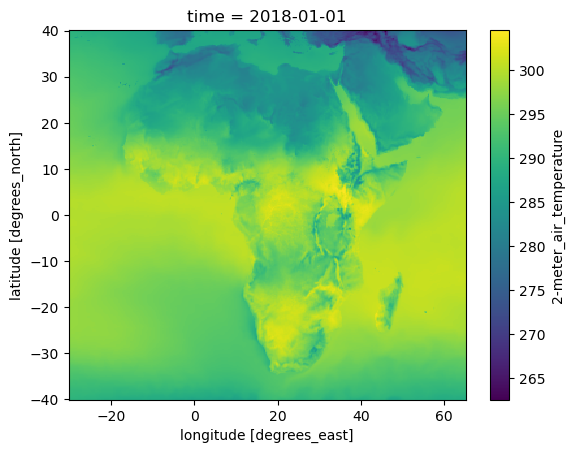

In [5]:
ds.t2m[0].plot()